# Module 7 Assignment

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `# YOUR CODE HERE`. Do not write your answer anywhere else other than where it says `# YOUR CODE HERE`. Anything you write elsewhere will be removed or overwritten by the autograder.
2. Before you submit your assignment, make sure everything runs as expected. Go to the menubar, select Kernel, and restart the kernel and run all cells (Restart & Run all).
3. Do not change the title (i.e. file name) of this notebook.
4. Make sure that you save your work (in the menubar, select File → Save and CheckPoint).
5. All work must be your own, if you do use any code from another source (such as a course notebook or a website) you need to properly cite the source.

-----

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#from nose.tools import assert_is_instance, assert_equal, assert_almost_equal

-----

## Loading Car Specification Data

In this assignment, we will work with the car specification-price data set to perform clustering analysis. Before we build a model, we first load the data into the assignment notebook, and randomly sample several rows. The second Code cell removes non-numeric features.

-----

In [2]:
# Load data
df = pd.read_csv('imports-85.data')
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,'engine-location',wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio',horsepower,peak-rpm,city-mpg,highway,price
40,0,85,5,1,std,4.0,2,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,10295.0
181,-1,122,19,1,std,4.0,1,rwd,front,104.5,...,161,mpfi,3.27,3.35,9.2,156,5200,19,24,15750.0
3,2,164,1,1,std,4.0,2,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
22,1,118,4,1,std,2.0,3,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6377.0
37,0,106,5,1,std,2.0,3,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,7895.0


In [3]:
# Remove non-numeric features
df_simple = df[df.columns[df.dtypes!=object]]
df_simple.head()

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio',city-mpg,highway,price
0,3,122,0,1,2.0,4,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495.0
1,3,122,0,1,2.0,4,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500.0
2,1,122,0,1,2.0,3,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500.0
3,2,164,1,1,4.0,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950.0
4,2,164,1,1,4.0,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450.0


-----

## Problem 1: K-Means Clustering

For this problem, you will complete the `cluster` function, started below, to perform K-Means clustering on an input DataFrame. This function must create the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) estimator, and apply this estimator to the input data to predict cluster membership. Your function will return both the model, and the cluster labels for each instance in the input data set.

-----

In [4]:
from sklearn.cluster import KMeans

X = df_simple.values

X

# def cluster(data, rs=0, n_clusters=5):
#     """
#     Applies KMeans to find n_clusters in the given data.
    
#     Parameters
#     ----------
#     data: The dataset to apply clustering to
#     rs: A paremter for reproducibility
#     n_clusters: The number of clusters
    
#     Returns
#     -------
#     model: the K-means model object
#     clusters: the cluster label of each datapoint
#     """
    
#     ### YOUR CODE HERE
    
#     return model, clusters

array([[ 3.0000e+00,  1.2200e+02,  0.0000e+00, ...,  2.1000e+01,
         2.7000e+01,  1.3495e+04],
       [ 3.0000e+00,  1.2200e+02,  0.0000e+00, ...,  2.1000e+01,
         2.7000e+01,  1.6500e+04],
       [ 1.0000e+00,  1.2200e+02,  0.0000e+00, ...,  1.9000e+01,
         2.6000e+01,  1.6500e+04],
       ...,
       [-1.0000e+00,  9.5000e+01,  2.1000e+01, ...,  1.8000e+01,
         2.3000e+01,  2.1485e+04],
       [-1.0000e+00,  9.5000e+01,  2.1000e+01, ...,  2.6000e+01,
         2.7000e+01,  2.2470e+04],
       [-1.0000e+00,  9.5000e+01,  2.1000e+01, ...,  1.9000e+01,
         2.5000e+01,  2.2625e+04]])

In [5]:
kmeans = KMeans(n_clusters=6, random_state=1)

In [6]:
X_new = kmeans.fit_transform(X)
X_new

array([[20695.87602014,  1685.54146739,  3458.5134421 ,  6008.39392791,
        29085.17643501, 10257.05539007],
       [17694.51433137,  4689.8803871 ,   584.44950955,  9008.65682636,
        26082.69311099,  7258.96857827],
       [17681.98533671,  4694.76834616,   447.74300074,  9025.49360693,
        26072.2425188 ,  7241.97367406],
       ...,
       [12693.38593396,  9683.31991427,  4554.97699091, 14011.79959593,
        21083.71507733,  2253.83260013],
       [11702.84061396, 10677.24027258,  5546.14197634, 15008.23789795,
        20093.77801266,  1268.8997526 ],
       [11552.52618829, 10824.29676588,  5695.54915278, 15152.57205314,
        19942.92208794,  1113.28352811]])

In [7]:
# from sklearn.cluster import k_means_

# # Perform kMeans clustering
# k_means, clusters = cluster(df_simple, rs=1, n_clusters=6)

# # Test Function
# assert_is_instance(k_means, k_means_.KMeans)
# assert_is_instance(clusters, np.ndarray)
# assert_equal(k_means.n_clusters, 6)
# assert_equal(clusters[0],1)

-----

## Problem 2: The Elbow Method

For this problem, you will complete the `inertia_calc` function, started below, to compute the inertia values for different K-Means cluster models. This function will use the cluster model passed in via the `cluster_function` parameter to identify clusters in the `data` dataset by calling the appropriate `fit` function. The fitted model can be used to extract the model inertias, which should be aggregated in a NumPy array (along with all the different inertias for each value in the `n_clusters` array) that will be returned from the function.

-----

In [8]:
wcss = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

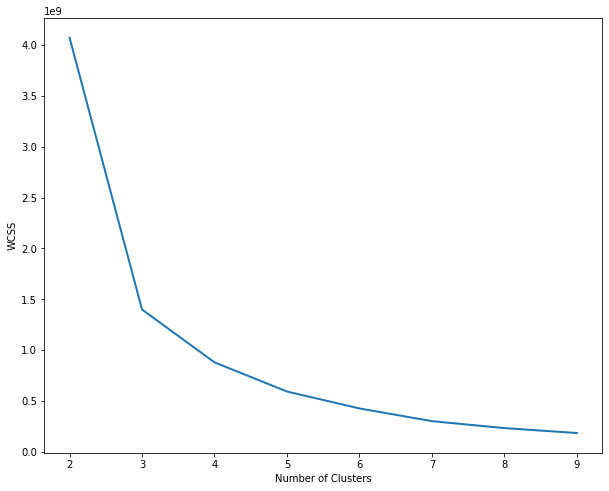

In [9]:
plt.figure(figsize=(10,8))
plt.plot(range(2,10),wcss,linewidth=2)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [10]:
np.sum(wcss) # Compute Intertia

8096449811.096569

In [11]:
# def intertia_calc(cluster_function, data, n_clusters):
#     """
#     Compute inertia values for different numbers of clusters
    
#     Parameters
#     ----------
#     cluster_function: The function used to determine clusters
#     data: The dataset to which the clustering function is applied
#     n_clusters: An array containing the different numbers of clusters
    
#     Returns
#     -------
#     intertias: A NumPy array of inertias for each k-means model.
#     """
    
#     ### YOUR CODE HERE
    
#     return intertias

In [12]:
# # Define cluster size array
# n_clusters = np.arange(2,10)

# # Compute Intertia
# inertia_vec=intertia_calc(cluster, df_simple, n_clusters)

# # Test Inertia Calculation
# assert_is_instance(inertia_vec, np.ndarray)
# assert_almost_equal(sum(inertia_vec), 8098575233.7986,places=2)

-----

The following Code cell generates the _elbow plot_, which indicates (based on the location of the elbow, or break in slope) that the optimal number of clusters is three.

-----

In [13]:
# Make the Elbow plot
# fig, ax = plt.subplots()
# ax.plot(n_clusters, inertia_vec)
# ax.set(title='Elbow Plot', 
#        xlabel='Number of Clusters', 
#        ylabel='Total distance')

# sns.despine()

-----

## Problem 3: Gaussian Mixture Models

For this problem, you will complete the `GMM_fit` function, started below, to compute the Gaussian Mixture Model for the supplied data. This function must create the [`GaussianMixture`](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) estimator, and apply this estimator to the input data to predict cluster membership. Your function will return both the model, and the cluster labels for each instance in the input data set.

-----

In [14]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=0).fit(X)

# def GMM_fit(data, rs=0, n_c=5):
#     '''
#     Apply a Gaussian Mixture Model to input data
    
#     Parameters
#     ----------
#     data: The dataset to which the mxture model is applied
#     rs: A parameter for reproducibility
#     n_c: The number of clusters
    
#     Returns
#     -------
#     model: the GMM model
#     clusters: the cluster label of each datapoint
#     '''
    
#     ### YOUR CODE HERE
    
#     return model, clusters

In [15]:
gm.means_

array([[9.45651383e-01, 1.33498982e+02, 1.15276086e+01, 8.86746529e-01,
        3.15909353e+00, 2.28111007e+00, 1.01390562e+02, 1.80938076e+02,
        6.69248918e+01, 5.39582982e+01, 2.85784525e+03, 1.37563188e+02,
        1.02030911e+01, 2.13003187e+01, 2.67639350e+01, 1.58099025e+04],
       [7.83811905e-01, 1.14060587e+02, 1.32281721e+01, 9.26958804e-01,
        3.11507022e+00, 2.21602228e+00, 9.58345201e+01, 1.66643961e+02,
        6.46754709e+01, 5.35226785e+01, 2.19320339e+03, 1.04119714e+02,
        9.96149993e+00, 2.93086182e+01, 3.50586700e+01, 8.13633241e+03],
       [6.25000000e-01, 1.19250000e+02, 8.43750000e+00, 8.12500000e-01,
        3.00000000e+00, 1.68750000e+00, 1.05681250e+02, 1.90537500e+02,
        6.92937500e+01, 5.39500000e+01, 3.53525000e+03, 2.30000000e+02,
        1.10812500e+01, 1.66875000e+01, 2.10625000e+01, 3.49976875e+04]])

In [16]:
gm.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
# Perform Gaussian Mixture Modeling
#GMM, clusters = GMM_fit(df_simple, rs=1, n_c=3)

# Test Function
# assert_is_instance(GMM, GaussianMixture)
# assert_is_instance(clusters, np.ndarray)
# assert_equal(GMM.n_components, 3)
# assert_equal(clusters[0],1)

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode 